# Intuition Plots

Plots and animations for the key concepts from flows.

In [22]:
# %%bash
# jupyter labextension uninstall jupyter-matplotlib && jupyter labextension uninstall @jupyter-widgets/jupyterlab-manager && conda update -y widgetsnbextension && conda update -y nodejs && pip uninstall -y ipympl && pip install git+https://github.com/matplotlib/jupyter-matplotlib.git#egg=ipympl && conda update jupyterlab -y && jupyter labextension install @jupyter-widgets/jupyterlab-manager && jupyter labextension install jupyter-matplotlib && jupyter labextension update --all && jupyter lab build && jupyter nbextension list && jupyter labextension list

In [23]:
# !pip install --upgrade qgrid==1.1.1

In [24]:
# !jupyter labextension install @8080labs/qgrid

In [25]:
# !pip install ipywidgets==7.5.1

In [27]:
# !pip install ipympl==0.4.1

In [28]:
# !pip uninstall jupyterlab_widgets
# !pip install jupyterlab_widgets

In [ ]:
!pip install ipywidgets --user
!pip install ipympl --user

In [38]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
!jupyter nbextension install --py --symlink --sys-prefix ipympl

Enabling notebook extension jupyter-js-widgets/extension...
Traceback (most recent call last):
  File "/opt/conda/envs/rapids/bin/jupyter-nbextension", line 10, in <module>
    sys.exit(main())
  File "/opt/conda/envs/rapids/lib/python3.8/site-packages/jupyter_core/application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/opt/conda/envs/rapids/lib/python3.8/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/opt/conda/envs/rapids/lib/python3.8/site-packages/notebook/nbextensions.py", line 980, in start
    super().start()
  File "/opt/conda/envs/rapids/lib/python3.8/site-packages/jupyter_core/application.py", line 253, in start
    self.subapp.start()
  File "/opt/conda/envs/rapids/lib/python3.8/site-packages/notebook/nbextensions.py", line 888, in start
    self.toggle_nbextension_python(self.extra_args[0])
  File "/opt/conda/envs/rapids/lib/python3.8/site-packages/not

In [57]:
%matplotlib widget
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

import seaborn as sns

In [58]:
widgets.__version__

'7.5.1'

In [59]:
freq_slider = widgets.FloatSlider(
    value=1,
    min=0.1,
    max=5,
    step=0.1,
    description='Frequency:',
    readout_format='.1f'
)

In [60]:
def update_plot(freq):
    y = np.sin(freq * x)
    line.set_ydata(y)
    fig.canvas.draw()

In [61]:
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots()
line, = ax.plot(x, y, lw=2)

widgets.interact(update_plot, freq=freq_slider)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=1.0, description='Frequency:', max=5.0, min=0.1, readout_format='.1f')…

<function __main__.update_plot(freq)>

In [45]:
import pandas as pd
df = pd.read_csv('data.csv', index_col='date', parse_dates=True)
df = df.resample('D').sum()

fig, ax = plt.subplots()
line, = ax.plot(df.index, df['value'], lw=2)

window_slider = widgets.IntSlider(
    value=7,
    min=1,
    max=30,
    step=1,
    description='Rolling window:'
)

def update_plot(window):
    rolling = df['value'].rolling(window=window).mean()
    line.set_ydata(rolling)
    fig.canvas.draw()

widgets.interact(update_plot, window=window_slider)

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [37]:
# # set up plot
# fig, ax = plt.subplots(figsize=(6, 4))
# ax.set_ylim([-4, 4])
# ax.grid(True)
 
# # generate x values
# x = np.linspace(0, 2 * np.pi, 100)
 

# def my_sine(x, w, amp, phi):
#     """
#     Return a sine for x with angular frequeny w and amplitude amp.
#     """
#     return amp*np.sin(w * (x-phi))
 

# @widgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01))
# def update(w = 1.0, amp=1, phi=0):
#     """Remove old lines from plot and plot new one"""
#     [l.remove() for l in ax.lines]
#     ax.plot(x, my_sine(x, w, amp, phi), color='C0')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=1, description='w', max=10), FloatSlider(value=1.0, description='amp', m…

## Key idea: bijections to build up complexity 

Our 1d example.

In [32]:
def gaus(x, mu=0,std=1):
    y = np.exp(-0.5 * ((x-mu)/std)**2)
    y /= 1/(np.sqrt(2*np.pi)*std)
    return y

In [33]:
def sigmoid(x,beta=1):
    return 1/(1+np.exp(-beta * x))

def invSigmoid(x,beta=1):
    return np.log(x/(1-x))/beta
    
def dsigmoid(x,beta=1):
    y = sigmoid(x,beta) 
    
    return y*(1-y)

In [34]:
beta=10

xx = np.linspace(0,1)[1:-1]

zz = invSigmoid(xx,beta=beta)

yy = gaus(zz)/dsigmoid(zz,beta=beta)

z = np.random.randn(1000)
x = sigmoid(z,beta=10)

sns.jointplot(z,x)

/opt/conda/envs/rapids/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [35]:
def three(x, y, z):
    return (x, y, z)
 
_ = widgets.interact(
    three, 
    x=(0, 10, 1), 
    y=True, 
    z=['a', 'b', 'c']
)

interactive(children=(IntSlider(value=5, description='x', max=10), Checkbox(value=True, description='y'), Drop…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=1, description='w', max=10), FloatSlider(value=1.0, description='amp', m…

In [16]:
## Step 2: Basic density morphing

$$p_X(x) = p_Z(f^{-1}(x)) \left| \frac{d f^{-1}}{dz} \right| = p_Z(f^{-1}(x)) \frac{1}{\left| \frac{d f}{dx} \right|}$$


SyntaxError: invalid syntax (<ipython-input-16-71bc8a2f424e>, line 3)

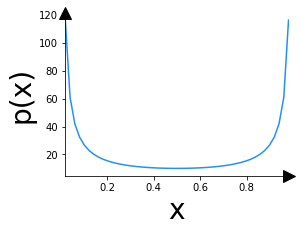

In [77]:

# plt.plot(xx,yy)

drawPlot(xx,yy,'dodgerblue','figures/sigmoid_of_gauss.pdf',var_name='x')

## Probability of $x = f(z)$

$$p_X(x) = p_Z(f^{-1}(x)) \left| \frac{d f^{-1}}{dz} \right| = p_Z(f^{-1}(x)) \frac{1}{\left| \frac{d f}{dx} \right|}$$


**Ack... idk _why_ this isn't working...**

Let's try to reproduce Lukas's example!!

In [70]:
z = np.random.randn(1000)
x = sigmoid(z,beta=10)

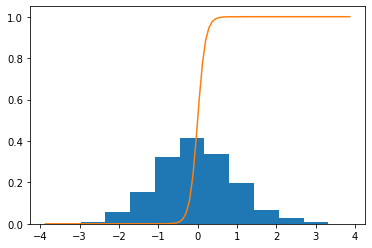

In [72]:
plt.hist(z,density=True)

plt.plot(zz,sigmoid(zz,beta=10))


# Multiple dimensions: